## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Yushan Cai
    - Email: yc844@drexel.edu
- Group member 2
    - Name: Yunxuan Hu
    - Email: yh575@drexel.edu
- Group member 3
    - Name: NA
    - Email: NA
- Group member 4
    - Name: NA
    - Email: NA

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Assignment group 2: Network and exploratory data analysis

## Module C _(40 pts)_ Exploring a network of ingredients
In This section we're going to experiment with some recipes data, but think of them as a network. These data can be obtained from Kaggle:

- https://www.kaggle.com/kaggle/recipe-ingredients-dataset

and are packaged with the assignment in the following directory:

- `./data/train.json`

__C1.__ _(2 pts)_ To start, load the recipe data from `json` format and print the first 5 recipes.

In [1]:
## code here
from pandas import json
import json
json_data= open('train.json')
data=json.load(json_data)
#print first 5 recipes
first=data[0:5]
print(first)

[{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}, {'id': 25693, 'cuisine': 'southern_us', 'ingredients': ['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']}, {'id': 20130, 'cuisine': 'filipino', 'ingredients': ['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']}, {'id': 22213, 'cuisine': 'indian', 'ingredients': ['water', 'vegetable oil', 'wheat', 'salt']}, {'id': 13162, 'cuisine': 'indian', 'ingredients': ['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thig

__C2.__ _(5 pts)_ Build an _undirected_ network representation of the ingredients data using the NetworkX module using the `.Graph()` graph type. In particular, for this network each ingredient will represent a node, and when two ingredients appear in the same recipe there should be a link drawn between them.

In [209]:
## code here
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

## initialize our network
G = nx.DiGraph()
names={}
number=0
for i in data:
    for j in i['ingredients']:
        for k in i['ingredients']:
            G.add_node(j)
            G.add_edge(j,k)
            number+=1
## Turn our directed network into an undirected network
G_undirected = nx.Graph(G)
## check out the adjacency matrix of our undirected network
nx.to_numpy_matrix(G_undirected)

matrix([[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

973270 6714
144.96127494787012


In [31]:
a

{'romaine lettuce': 799,
 'black olives': 597,
 'grape tomatoes': 675,
 'garlic': 3545,
 'pepper': 2971,
 'purple onion': 2134,
 'seasoning': 592,
 'garbanzo beans': 549,
 'feta cheese crumbles': 672,
 'plain flour': 521,
 'ground pepper': 983,
 'salt': 4881,
 'tomatoes': 2463,
 'ground black pepper': 3020,
 'thyme': 945,
 'eggs': 2668,
 'green tomatoes': 325,
 'yellow corn meal': 669,
 'milk': 2031,
 'vegetable oil': 3007,
 'mayonaise': 1288,
 'cooking oil': 993,
 'green chilies': 1012,
 'grilled chicken breasts': 66,
 'garlic powder': 1688,
 'yellow onion': 1795,
 'soy sauce': 2170,
 'butter': 2950,
 'chicken livers': 308,
 'water': 3894,
 'wheat': 194,
 'black pepper': 2430,
 'shallots': 1967,
 'cornflour': 399,
 'cayenne pepper': 1797,
 'onions': 3663,
 'garlic paste': 520,
 'lemon juice': 1868,
 'chili powder': 1802,
 'passata': 158,
 'oil': 2006,
 'ground cumin': 2079,
 'boneless chicken skinless thigh': 846,
 'garam masala': 945,
 'double cream': 217,
 'natural yogurt': 147,
 'b

__C3.__ _(8 pts)_ Utilize NetworkX and the ingredients network and find the node degrees, i.e., numbers of connections to other ingredients across the recipes. Use this to compute the network's average and median degrees, and to print the top $5$ ingredients by degree. Discuss this output and how it helps you to understand if you've constructed the network correctly.

_Response._ 
The salt, water, onions, garlic, sugar are the top 5 ingredients by degree.I think these things are the basic needs for recipes and very common for use.

In [38]:
## code here
import statistics 
a=dict(G_undirected.degree)
total=0
count=0
b=[]
for i in a.keys():
    total+=a[i]
    count+=1
    b.append(a[i])
    
print(total,count)
average=(total-count)/count
##average and median
print(average,statistics.median(b))
###the top 5 ingredients
c=sorted(a.items(), key=lambda x: x[1],reverse=True)
print(c[0:5])

973270 6714
143.96127494787012 40.0
[('salt', 4881), ('water', 3894), ('onions', 3663), ('garlic', 3545), ('sugar', 3437)]


__C4.__ _(7 pts)_ Now, for each degree $k$ your job is to count up the number of nodes $n_k$ that have degree $k$. Store the unique values of $k$ in a list called `degree_numbers` and the corresponding values $n_k$ in a list called `degree_counts`. Sort these two lists in order of decreasing $k$ and print the five most common degree numbers.

Comment on the top five most common degree numbers (the mode) and any difference in these values from the average and median degrees, reported in __C3__ in the response box below. Do you believe these data are skewed?

\[Hint: `from collections import Counter` for an object type that will make the counting and sorting processes very easy when starting from a list of `degrees`.\] 

_Response._
As we can see, the most common degree numbers are 15,12,11,10,14. There is a large difference between (average,median) and the results. I think the data are skewed.
[(15, 174), (12, 169), (11, 162), (10, 155), (14, 150)]

In [100]:
## code here
from collections import Counter
degree_numbers=[]
degree_counts=[]
degree={}
for i in a.values():
    if i not in degree_numbers: 
            degree_numbers.append(i)
            m={i:1}
            degree.update(m)
    else:
        degree[i]+=1
##decreasing k
degree_numbers=sorted(degree_numbers,reverse=True)
print(degree_numbers)
##corresponding nk
d=sorted(degree.keys(),reverse=True)
for i in d:
    degree_counts.append(degree[i])
print(degree_counts)

###the five most common degree numbers
common_degree=sorted(degree.items(),key=lambda x: x[1],reverse=True)
print(common_degree[0:5])


##another way to count also get the same answer
#degree3 = Counter(i for i in a.values())
#sorted(degree3.items(),key=lambda x:x[1],reverse=True)

[4881, 3894, 3663, 3545, 3437, 3430, 3201, 3020, 3007, 2971, 2950, 2708, 2705, 2677, 2668, 2463, 2430, 2410, 2405, 2299, 2170, 2138, 2134, 2079, 2055, 2031, 2006, 1995, 1989, 1967, 1913, 1868, 1847, 1830, 1824, 1806, 1802, 1797, 1795, 1780, 1779, 1774, 1733, 1727, 1726, 1716, 1709, 1690, 1688, 1687, 1681, 1666, 1654, 1635, 1630, 1609, 1605, 1596, 1573, 1572, 1563, 1557, 1553, 1547, 1540, 1533, 1519, 1501, 1494, 1471, 1451, 1450, 1446, 1441, 1436, 1429, 1407, 1397, 1386, 1385, 1359, 1353, 1330, 1329, 1312, 1297, 1292, 1291, 1289, 1288, 1278, 1276, 1273, 1262, 1259, 1254, 1244, 1240, 1235, 1232, 1230, 1224, 1220, 1218, 1208, 1206, 1193, 1192, 1190, 1189, 1187, 1171, 1169, 1167, 1158, 1154, 1149, 1139, 1137, 1133, 1129, 1127, 1121, 1117, 1114, 1113, 1106, 1103, 1102, 1100, 1079, 1074, 1061, 1055, 1052, 1051, 1043, 1041, 1040, 1039, 1037, 1033, 1029, 1028, 1026, 1024, 1023, 1021, 1012, 1010, 1004, 1003, 999, 998, 995, 993, 983, 982, 981, 976, 975, 972, 971, 970, 969, 963, 962, 955, 952, 95

__C5.__ _(5 pts)_ Your next job is to visualize the `degree_numbers` and `degree_counts` data. In particular, create a scatter plot of the _logarithms_ of these values, using the numpy utility `np.log10()` on each. 

When you've generated the visualization, complete with labels for both axes, describe any visual trends that you see in the markdown box below. Do the two (transformed) quantities appear to exhibit a relationship?

_Response._  As we saw the pic below,then the degree numbers get bigger, the frequency of this degree numbers first increase but then decreases quickly.

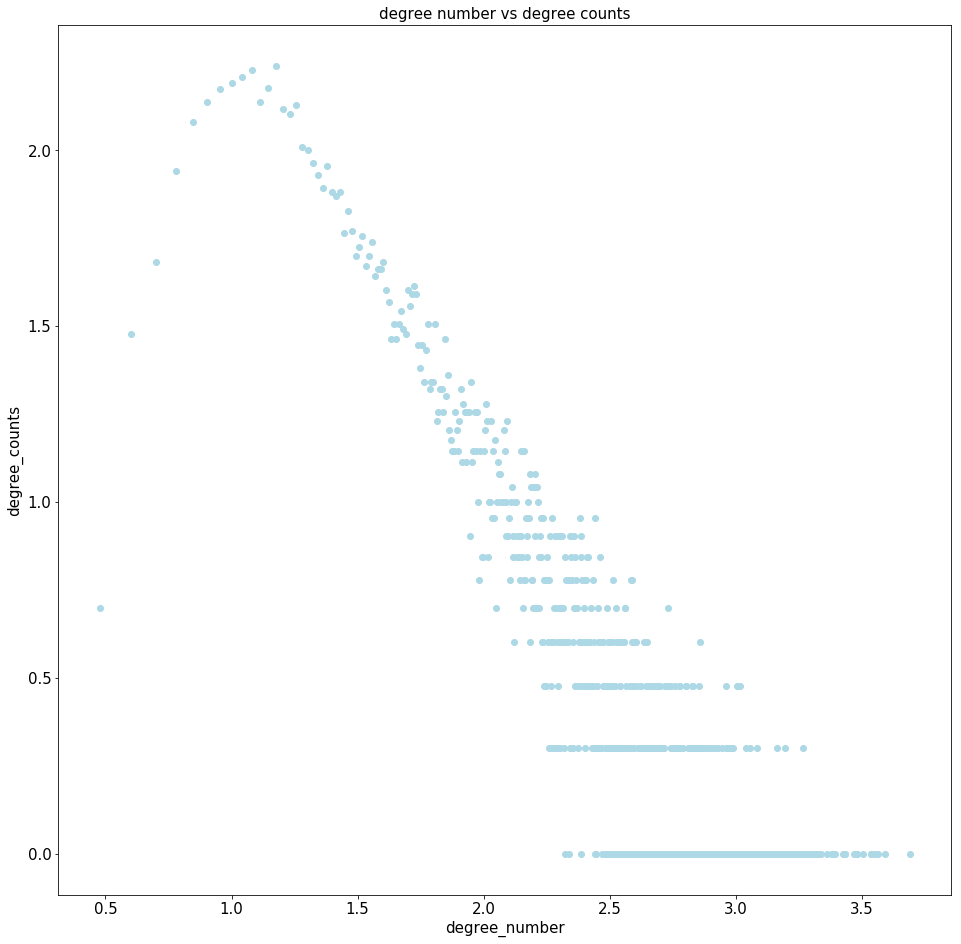

In [200]:
## code here
## set the figure dimensions
import numpy as np
scat_fig = plt.figure(figsize = (16, 16))
    
## make a scatter plot
_  = plt.scatter(np.log10(degree_numbers),np.log10(degree_counts),
    color = "lightblue"
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("degree number vs degree counts", fontsize = 15)

## Set the y-label
_ = plt.ylabel("degree_counts", fontsize = 15)

## Set the y-label
_ = plt.xlabel("degree_number", fontsize = 15)

__C6.__ _(3 pts)_ For a give node $u$ in our network $G$, let $\Gamma(u)$ denote the set of $u$'s neighbors, i.e., set of nodes linked to $u$.

In this part of the assignment we'll be utilizing the Jaccard coefficient (__Chapter 3.1.5.2__) similarity function on neighborhoods of nodes to determine the foods most likely to link to one anothers, i.e., appear in a recipe together heretofore unseen.

In particular, the Jaccard coefficient of nodes $u$ and $v$ is defined as

$$\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$$

where $\Gamma(u)$ denotes the set of neighbors of $u$ and can be computed through networkx utilizing the `nx.jaccard_coefficient(G, ebunch=None)` utility.

To begin, apply the `nx.jaccard_coefficient()` function to a few seemingly dispirate and a few seemingly similar ingredients (to your sensibilities). Once this is done, remark on the function of the measure in the response box below. Does this measure work as expected?

_Response._ Yes. This is exactly what I expected. The jaccard coefficient between eggs and milk is 0.5233 which means some comtents are simialr, however, the jaccard coefficient between eggs and apples is 0.192 which is common.

In [248]:
## code here
def jaccard(list1):
    preds = nx.jaccard_coefficient(G_undirected,ebunch= list1 )
    return preds


In [258]:
food=[('eggs','milk'),('eggs','apples')]
jaccard(food)
for u, v, p in preds:
         print(u, v, p)

In [261]:
def jaccard(v):
    preds = nx.jaccard_coefficient(G_undirected,ebunch= v )
    for u, m, p in preds:
         print(u, m, p)

In [262]:
jaccard(food)

eggs milk 0.5233614536015574
eggs apples 0.19193020719738277


__C7.__ _(5 pts)_ Next, create a list of node `names` using the `G.nodes()` method and corresponding adjacency matrtix from `nx.to_numpy_matrx()`. With these, create a function called `unlinked(v)` that returns a list of the names of all other nodes (ingredients) for which the node (queried ingredient) $v$ shares no link. 

Compare the size of outputs from this function when the two nodes `'salt'` and `'chocolate'` are queried, and comment in the response box below. Does the output make sense?

_Response._ yes. Because the chocolate is always for bakery and eatting alone, so that there are 6515 kinds of ingredients have  no relationship with it. The salt, a nessceary spicy, only has 1834 non-relational ingredients.

In [155]:
## code here
names=G.nodes()
G_undirected= nx.to_numpy_matrix(G)

def unlinked(v):
    return nx.non_neighbors(G, v)
    


In [172]:
## code here\
count1=Counter()
for i in unlinked('chocolate'):
    count1['chocolate']+=1
    print(i)
    
    
for i in unlinked('salt'):
    count1['salt']+=1
    print(i)
    
print(count1)

romaine lettuce
black olives
grape tomatoes
pepper
purple onion
seasoning
garbanzo beans
feta cheese crumbles
plain flour
ground pepper
ground black pepper
green tomatoes
yellow corn meal
mayonaise
cooking oil
green chilies
grilled chicken breasts
garlic powder
yellow onion
soy sauce
chicken livers
wheat
shallots
cornflour
cayenne pepper
garlic paste
lemon juice
chili powder
passata
ground cumin
boneless chicken skinless thigh
garam masala
double cream
natural yogurt
bay leaf
fresh ginger root
ground ginger
olive oil
medium shrimp
chopped cilantro
jalapeno chilies
flat leaf parsley
skirt steak
white vinegar
sea salt
chorizo sausage
white almond bark
almond extract
dried cranberries
fresh pineapple
poblano peppers
corn tortillas
cheddar cheese
iceberg lettuce
lime
chopped cilantro fresh
chopped tomatoes
fresh basil
extra-virgin olive oil
sweet pepper
dried oregano
sharp cheddar cheese
swiss cheese
provolone cheese
canola oil
sausages
low sodium soy sauce
fresh ginger
dry mustard
green b

__C8.__ _(5 pts)_ Finally, write a function called `likely_ingredients(v)` that computes the Jaccard coefficients for all nodes returned by our previous functiton, i.e., from calling `unlinked(v)`. Return the these ingredient pairs and coefficients sorted by the coefficient values and print the top $5$ hits for a few different examples. 

Finally, in the response box below address the following question

> Do you think this analysis provides information more usefule for determining substitutions, for constructing new recipes pairings? Do you htink this could support either or both interests, and if so, how?

_Response._  

In [ ]:
## code here
def likely_ingredients(v):
    for node2 in G.nodes:
        listc=[(v,str(node2))]
        coff=jaccard(listc)


    

In [ ]:
for i in G.nodes:
    likely_ingredients(i)